# AICadium ML Project
### Build a machine learning model to predict whether a customer will buy a product or not.

The focus is not on optimizing the model evaluation metrics, but in demonstrating familiarity in multiple aspects of creating a solution, including data exploration, feature engineering, model selection, etc.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import datetime
from statsmodels.graphics.mosaicplot import mosaic
sns.set_style("darkgrid")

In [129]:
# TODO:
# - try different classifiers (logistic regression, SVM)
# - clean up the section on feature selection
# - find out how to export model/weights for ML ops deployment

## Get Acquainted with the Dataset

In [2]:
customer_data = pd.read_csv('coding_round_data.csv')

In [119]:
print(f'Number of Records: {len(customer_data)}')
print(f'Number of Variables: {len(customer_data.keys())}')
print(f'Any NaN values? {customer_data.isnull().values.any()}')

# Explicitly define these variables to make sure functions below are taking in the right variables
# (as opposed to doing position-based indexing, e.g. customer_data.iloc[:, 0:10])
num_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', \
            'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
cat_vars = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# The first 10 variables are numerical, while the last 8 are categorical: {'Month', ..., 'Revenue'}.
# The column 'Revenue' contains our data labels.
customer_data.head()

Number of Records: 12330
Number of Variables: 20
Any NaN values? False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,False,False,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,False,False,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,False,False,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,False,False,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,True,False,0,0,1


In [4]:
customer_data.describe()

# We see outliars for quite a few of these variables. May need to address this to avoid problems during model training.

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


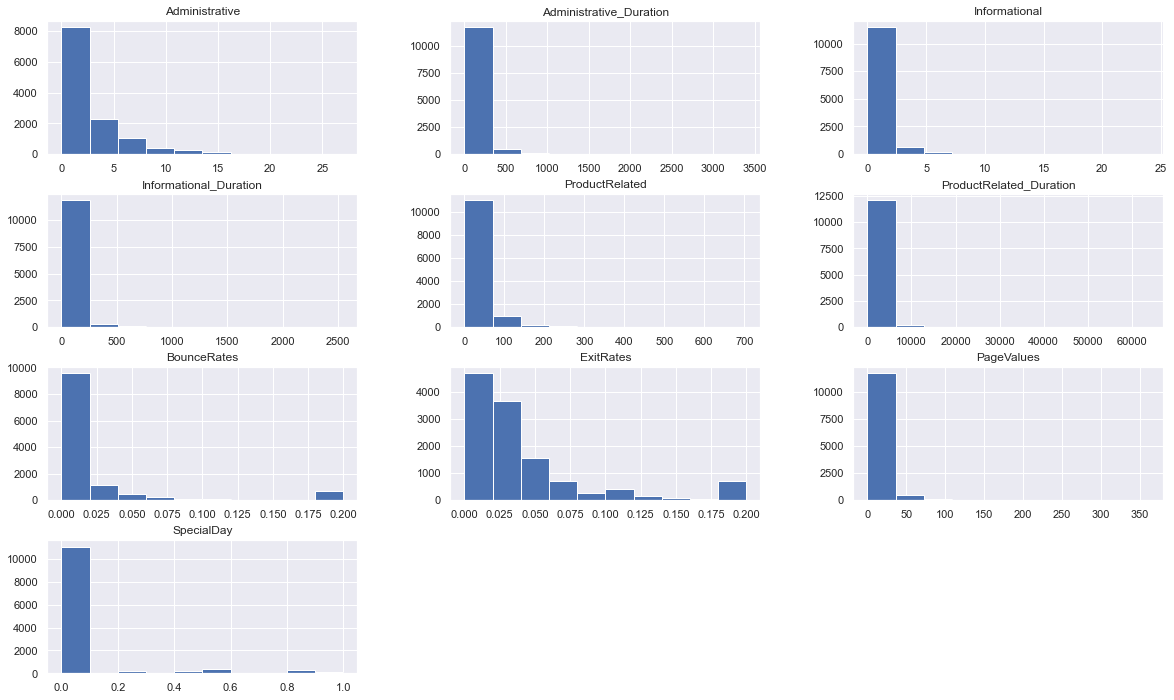

In [5]:
# Plot histograms of the numerical variables
sns.set(rc = {'figure.figsize':(20,12)})

customer_data.loc[:, num_vars].hist();

# TODO: replot these after removing outliars

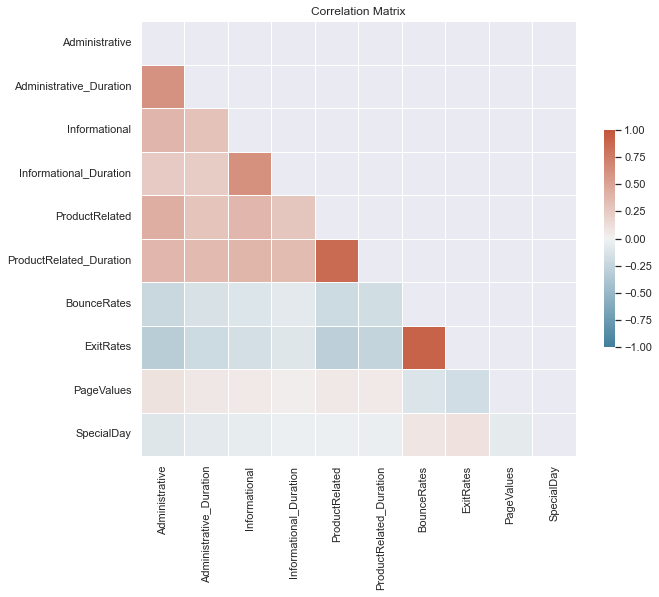

In [6]:
sns.set(rc = {'figure.figsize':(10,8)})

# Visualize a correlation matrix for the numerical variables
corr_mat = customer_data.loc[:, num_vars].corr()

# mask out the upper triangle for better viewing
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0.0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.title('Correlation Matrix');

# We see high correlations between:
# - ProductRelated_Duration and ProductRelated
# - ExitRates and BounceRates

# To avoid collinearities, for each of these pairs, we should potentially pick the variable that has the higher predictive
# power w.r.t Revenue

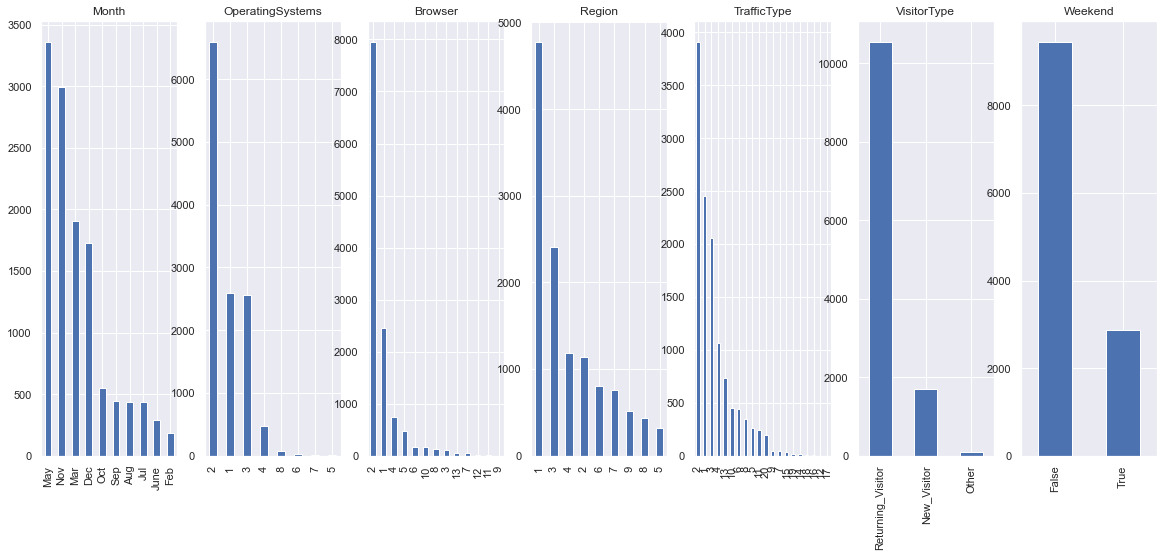

In [7]:
sns.set(rc = {'figure.figsize':(20,8)})
# Plot histograms of the categorical variables

fig, ax = plt.subplots(1, len(cat_vars))
for (i, var) in enumerate(customer_data[cat_vars]):
    customer_data[var].value_counts().plot(kind='bar', ax=ax[i]).set_title(var);

### Mosaic Plots to Assess Predictive Power of Categorical Variables

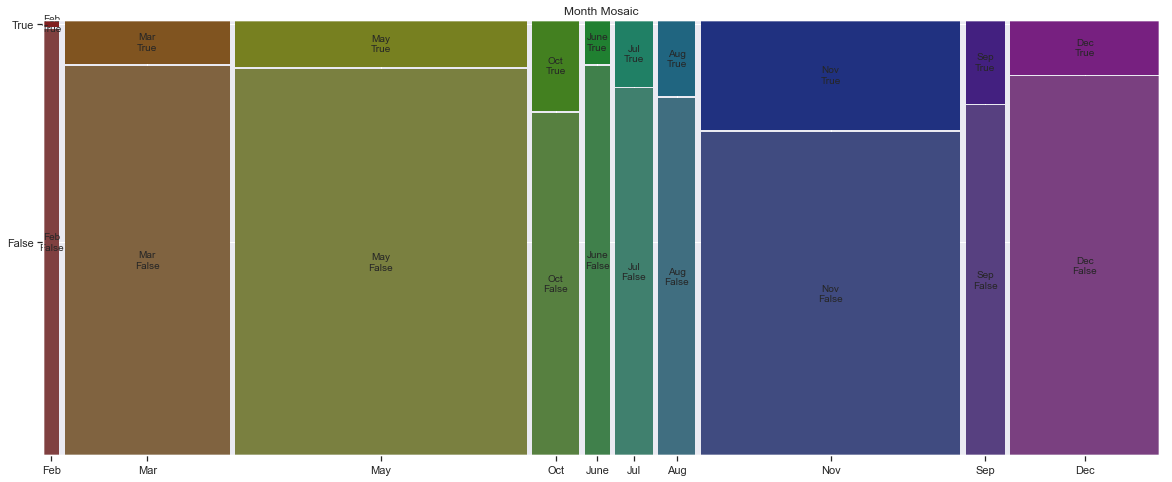

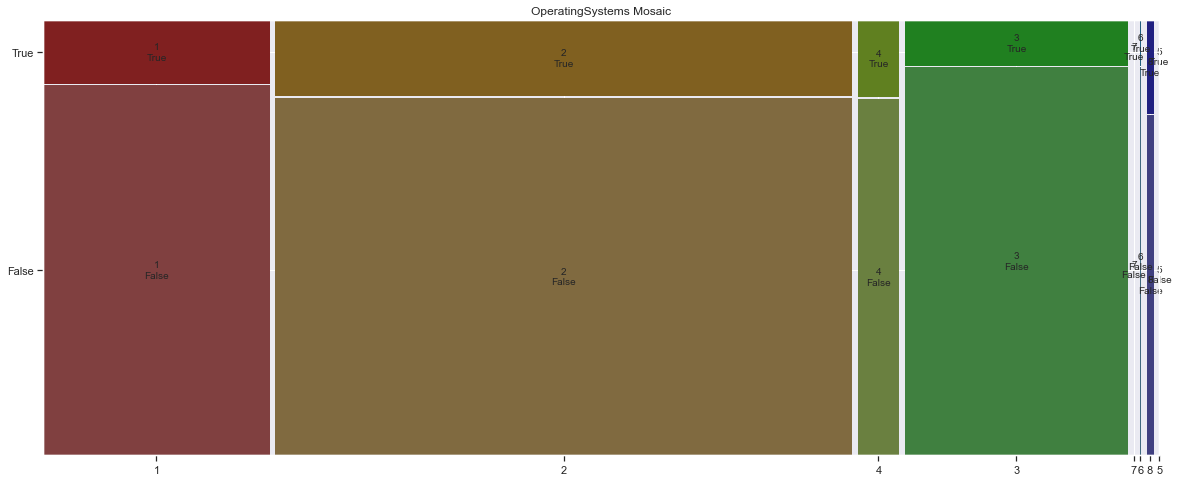

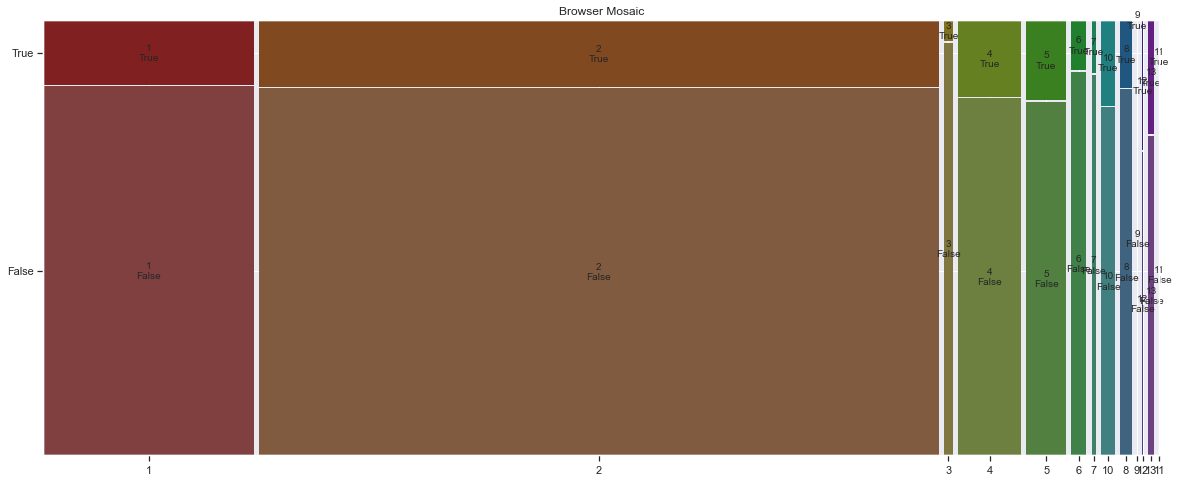

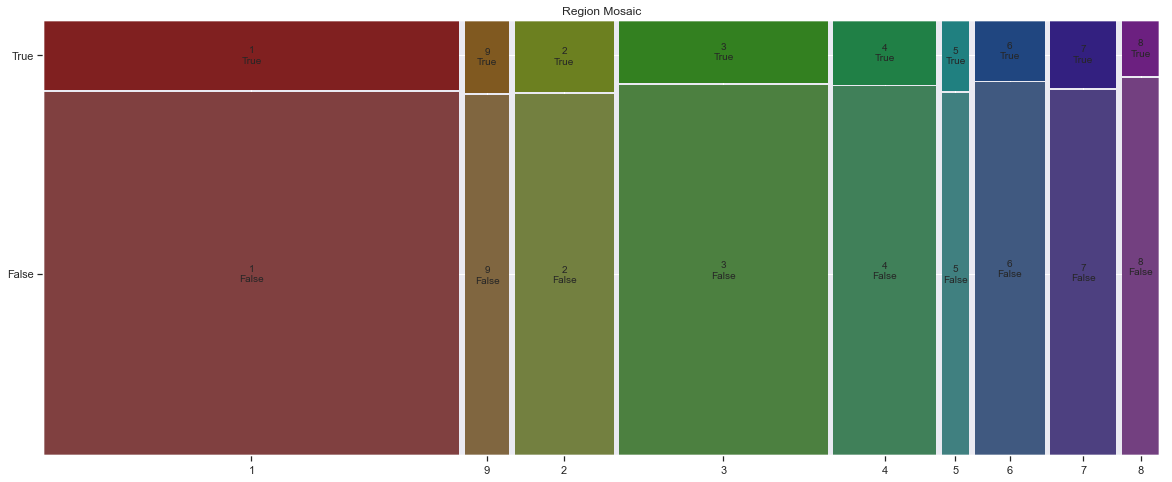

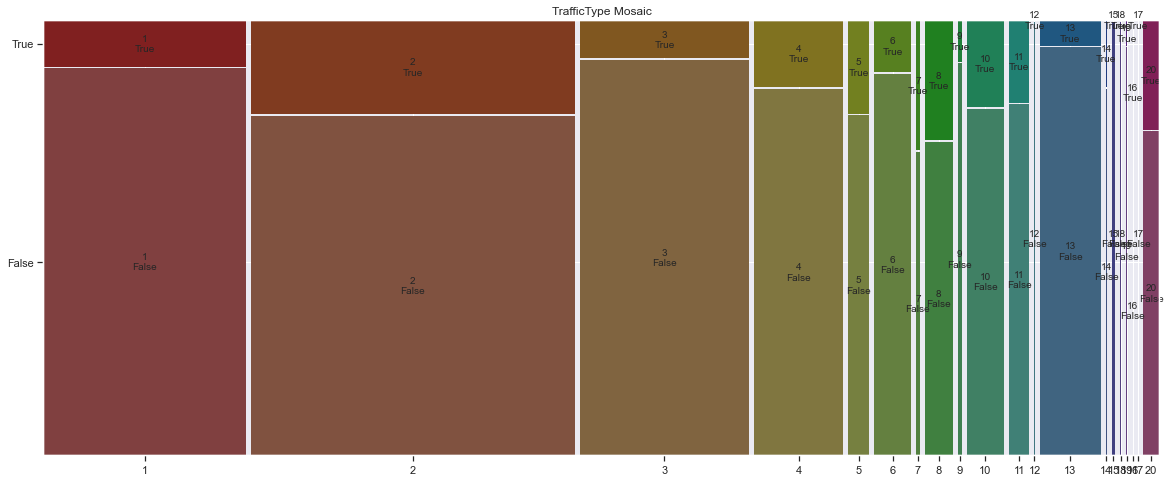

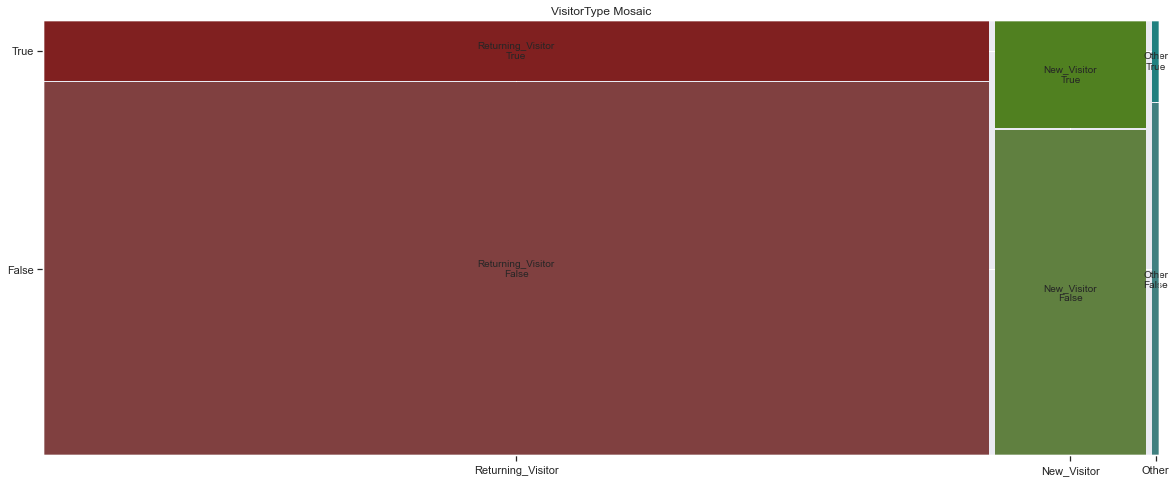

In [8]:
sns.set(rc = {'figure.figsize':(20,8)}) # 20, 20 for good viewing
# matplotlib.rcParams.update({'font.size': 16})

mosaic(customer_data, ['Month', 'Revenue'], title='Month Mosaic');

mosaic(customer_data, ['OperatingSystems', 'Revenue'], title='OperatingSystems Mosaic');

mosaic(customer_data, ['Browser', 'Revenue'], title='Browser Mosaic');

# Whether a customer bought or not does not seem to vary much by region.
mosaic(customer_data, ['Region', 'Revenue'], title='Region Mosaic');

mosaic(customer_data, ['TrafficType', 'Revenue'], title='TrafficType Mosaic');

# A new visitor is twice as likely as a returning visitor to purchase a product. A good candidate for 
# one hot encoding given the signal + the limited number of values (to avoid adding too many dimensions).
mosaic(customer_data, ['VisitorType', 'Revenue'], title='VisitorType Mosaic');

# some ones to try? visitortype, month, traffictype, browser

# For a given categorical variable, have to be careful of reading too much into a particular value
# having a high signal of a customer purchasing when there are few samples of that value.

In [110]:
# Use one-hot encoding on VisitorType so we can use this variable in our model.
customer_data = pd.get_dummies(customer_data, columns=['VisitorType'])

In [111]:
customer_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,False,False,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,False,False,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,False,False,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,False,False,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,True,False,0,0,1


## Model Training and Evaluation

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, cross_validate

In [120]:
# Removing variables to avoid collinearities (seemed to slightly worse performance? revisit this)
# num_vars.remove('BounceRates')
# num_vars.remove('ProductRelated')

# Specify the features we are going to use
# features = num_vars
features = num_vars + ['VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor']
features.remove('BounceRates')
features.remove('ProductRelated')
features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated_Duration',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'VisitorType_New_Visitor',
 'VisitorType_Other',
 'VisitorType_Returning_Visitor']

In [121]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(customer_data.loc[:, features], customer_data.loc[:, 'Revenue'], \
                     test_size=0.2, random_state=42)

In [122]:
class RFThreshClassifier(RandomForestClassifier):
    """ Random forest classifier with predictions modified by a probability threshold. """
    def predict(self, X, threshold = 0.3):
        """Usage: clf.predict(X, threshold = 0.8)
           Default threshold chosen based on cross-validation performance on training data."""
        pred_probs = super(RFThreshClassifier, self).predict_proba(X)
        return pred_probs[:, 1] > threshold

In [123]:
# Use balanced class weighting due to the imbalance of 'True' and 'False' samples in 'Revenue'.
clf = RFThreshClassifier(class_weight='balanced', random_state=0)

### Model Selection

What's worse, not identifying a customer that actually ends up buying a product, or incorrectly believing a customer is going to buy when he's not? I believe the former is worse, i.e. false negatives are worse than false positives, because we otherwise are missing out on targeting customers that can generate revenue for the business. As such, we should optimize for recall than precision when evaluating our models.

Precision = TP / (TP + FP)

Recall  = TP / (TP + FN)

In [125]:
# Using cross-validation, I determined the following:
# - Adding the one-hot encodings of categorical variable VisitorType decreased model performance.
# - Eliminating `BounceRates` and `ProductRelated`, while desirable from the perspective of removing collinearities, 
#   did not impact model performance significantly.

scores = cross_validate(clf, X_train, y_train, cv=10, scoring={'recall', 'precision', 'f1'})
print(f'Recall:    Mean={scores["test_recall"].mean()}, Std={scores["test_recall"].std()}')
print(f'Precision: Mean={scores["test_precision"].mean()}, Std={scores["test_precision"].std()}')
print(f'F1 Score:  Mean={scores["test_f1"].mean()}, Std={scores["test_f1"].std()}')

# In the future, more work can be done tuning other hyperparameters of the random forest model,
# e.g. max_depth, max_leaf_nodes, bootstrap, etc.

Recall:    Mean=0.7375436241610739, Std=0.03743297413127171
Precision: Mean=0.5941150912882743, Std=0.04650376532694706
F1 Score:  Mean=0.6569741313868533, Std=0.03476364750587159


In [126]:
# Before performing any further steps, make sure we fit on all the training data.
clf.fit(X_train, y_train);

### Ranking Features by Importance

Maybe should do an initial training of the dataset to produce this plot, and use to filter out features

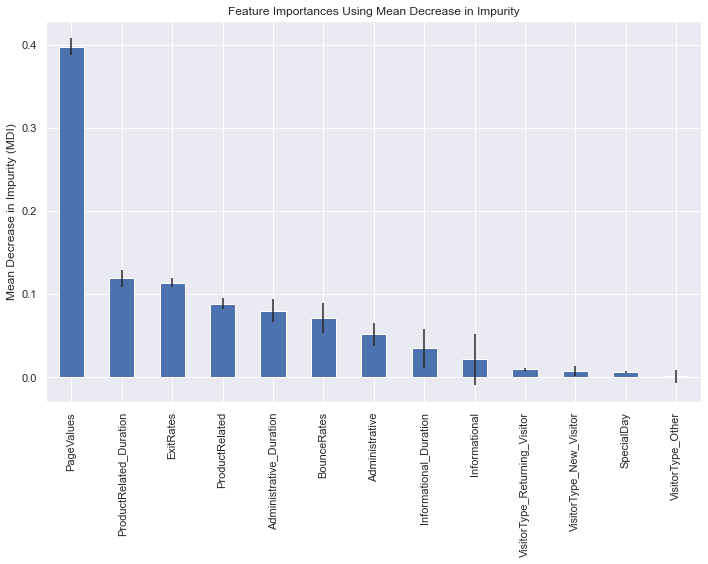

In [62]:
sns.set(rc = {'figure.figsize':(10,8)})

std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)

fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importances Using Mean Decrease in Impurity")
ax.set_ylabel("Mean Decrease in Impurity (MDI)")
fig.tight_layout()

### Model Evaluation

Test the model's performance on unseen data (the 20% of data not used for training/cross-validation)

In [68]:
y_pred = clf.predict(X_test)
y_test_probs = clf.predict_proba(X_test)[:, 1] # probability of the positive class (should match clf.classes_)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred)
print(f'Precision: {precision[1]}')
print(f'Recall   : {recall[1]}')
print(f'F1 Score : {fscore[1]}')

[[1967   88]
 [ 208  203]]
Precision: 0.697594501718213
Recall   : 0.49391727493917276
F1 Score : 0.5783475783475783


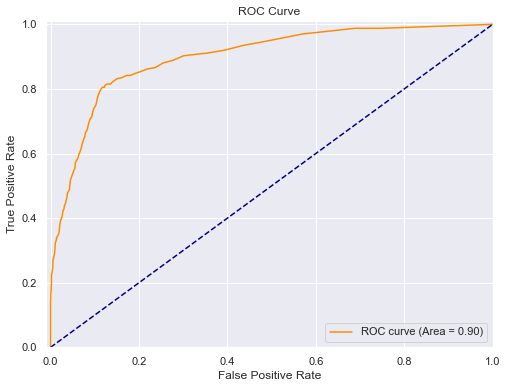

In [70]:
sns.set(rc = {'figure.figsize':(8,6)})

fpr, tpr, thresh = roc_curve(y_test, y_test_probs)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label="ROC curve (Area = %0.2f)" % auc(fpr, tpr));
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.01, 1.0]), plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate"), plt.ylabel("True Positive Rate")
plt.title("ROC Curve"), plt.legend(loc="lower right");